In [17]:
import sympy as sp
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pygmo
%matplotlib notebook

In [18]:
x, y = sp.symbols("x y")
parabol = x ** 2 + y ** 2
test_case1 = sp.sin(x) * sp.cos(y)
rozenbrock = -100 * ((y - (x ** 2)) ** 2) - ((1 - x ** 2))
sinShefel = x * sp.sin(sp.sqrt(sp.Abs(x))) + y * sp.sin(sp.sqrt(sp.Abs(y)))
multyFun = x * sp.sin(4 * sp.pi * x) + y * sp.sin(4 * sp.pi * y)
shaffer = 0.5 - ((sp.sin(sp.sqrt(x ** 2 + y ** 2)) ** 2 - 0.5) / (1 + 0.001 * (x ** 2 + y ** 2)))
Rastigan = -20 + (10  * sp.cos(2 * sp.pi * x) - x ** 2) + (10  * sp.cos(2 * sp.pi * y) - y ** 2)
threehump = -2 * x ** 2 + 1.05 * x ** 4 - (x ** 6) / 6 - x * y - y ** 2
Bird = -sp.sin(x) * sp.exp((1 - sp.cos(y)) ** 2) - sp.cos(y) * sp.exp((1 - sp.sin(x)) ** 2) - (x - y) ** 2
Ekli = -sp.exp(1) + 20 * sp.exp(-sp.sqrt((x ** 2 + y ** 2) / 50)) + sp.exp(0.5 * sp.cos(2 * sp.pi * x) + sp.cos(2 * sp.pi * y))
Bukin = -100 * sp.sqrt(sp.Abs(-y + 0.01 * x ** 2)) - 0.01 * sp.Abs(x + 10)
Shveffel1 = -sp.Abs(x) - sp.Abs(y) - sp.Abs(x) * sp.Abs(y)
Shveffel2 = -(x ** 2) - (x + y) ** 2
twoEkstr = -3 * x ** 2 - 4 * y ** 2 - 23 * sp.cos(x - 0.5)
Grivanka = -1 - (x ** 2 + y ** 2) / 4000 + sp.cos(x) * sp.cos(y / sp.sqrt(2))

In [42]:
Lparabol = sp.lambdify([x, y], parabol, modules = ['numpy'])
Ltest_case1 = sp.lambdify([x, y], test_case1, modules = ['numpy'])
Lrozenbrock = sp.lambdify([x, y], rozenbrock, modules = ['numpy'])
LsinShefel = sp.lambdify([x, y], sinShefel, modules = ['numpy'])
LmultyFun = sp.lambdify([x, y], multyFun, modules = ['numpy'])
Lshaffer = sp.lambdify([x, y], shaffer, modules = ['numpy'])
LRastigan = sp.lambdify([x, y], Rastigan, modules = ['numpy'])
Lthreehump = sp.lambdify([x, y], threehump, modules = ['numpy'])
LBird = sp.lambdify([x, y], Bird, modules = ['numpy'])
LEkli = sp.lambdify([x, y], Ekli, modules = ['numpy'])
LBukin = sp.lambdify([x, y], Bukin, modules = ['numpy'])
LShveffel1 = sp.lambdify([x, y], Shveffel1, modules = ['numpy'])
LShveffel2 = sp.lambdify([x, y], Shveffel2, modules = ['numpy'])
LtwoEkstr = sp.lambdify([x, y], twoEkstr, modules = ['numpy'])
LGrivanka = sp.lambdify([x, y], Grivanka, modules = ['numpy'])

In [43]:
lparabol = lambda x: Lparabol(x[0], x[1])
ltest_case1 = lambda x: Ltest_case1(x[0], x[1])
lrozenbrock = lambda x: Lrozenbrock(x[0], x[1])
lsinShefel = lambda x: LsinShefel(x[0], x[1])
lmultyFun = lambda x: LmultyFun(x[0], x[1])
lshaffer = lambda x: Lshaffer(x[0], x[1])
lRastigan = lambda x: LRastigan(x[0], x[1])
lthreehump = lambda x: Lthreehump(x[0], x[1])
lBird = lambda x: LBird(x[0], x[1])
lEkli = lambda x: LEkli(x[0], x[1])
lBukin = lambda x: LBukin(x[0], x[1])
lShveffel1 = lambda x: LShveffel1(x[0], x[1])
lShveffel2 = lambda x: LShveffel2(x[0], x[1])
ltwoEkstr = lambda x: LtwoEkstr(x[0], x[1])
lGrivanka = lambda x: LGrivanka(x[0], x[1])

In [88]:
Dparabol = sp.lambdify([x, y], [parabol.diff(x), parabol.diff(y)], modules = ['numpy'])
Dtest_case1 = sp.lambdify([x, y], [test_case1.diff(x), test_case1.diff(y)], modules = ['numpy'])
Drozenbrock = sp.lambdify([x, y], [rozenbrock.diff(x), rozenbrock.diff(y)], modules = ['numpy'])
DsinShefel = sp.lambdify([x, y], [sinShefel.diff(x), sinShefel.diff(y)], modules = ['numpy'])
DmultyFun = sp.lambdify([x, y], [multyFun.diff(x), multyFun.diff(y)], modules = ['numpy'])
Dshaffer = sp.lambdify([x, y], [shaffer.diff(x), shaffer.diff(y)], modules = ['numpy'])
DRastigan = sp.lambdify([x, y], [Rastigan.diff(x), Rastigan.diff(y)], modules = ['numpy'])
Dthreehump = sp.lambdify([x, y], [threehump.diff(x), threehump.diff(y)], modules = ['numpy'])
DBird = sp.lambdify([x, y], [Bird.diff(x), Bird.diff(y)], modules = ['numpy'])
DEkli = sp.lambdify([x, y], [Ekli.diff(x), Ekli.diff(y)], modules = ['numpy'])
DBukin = sp.lambdify([x, y], [Bukin.diff(x), Bukin.diff(y)], modules = ['numpy'])
DShveffel1 = sp.lambdify([x, y], [Shveffel1.diff(x), Shveffel1.diff(y)], modules = ['numpy'])
DShveffel2 = sp.lambdify([x, y], [Shveffel2.diff(x), Shveffel2.diff(y)], modules = ['numpy'])
DtwoEkstr = sp.lambdify([x, y], [twoEkstr.diff(x), twoEkstr.diff(y)], modules = ['numpy'])
DGrivanka = sp.lambdify([x, y], [Grivanka.diff(x), Grivanka.diff(y)], modules = ['numpy'])

In [89]:
dparabol = lambda x: np.array(Dparabol(x[0], x[1]))
dtest_case1 = lambda x: np.array(Dtest_case1(x[0], x[1]))
drozenbrock = lambda x: np.array(Drozenbrock(x[0], x[1]))
dsinShefel = lambda x: np.array(DsinShefel(x[0], x[1]))
dmultyFun = lambda x: np.array(DmultyFun(x[0], x[1]))
dshaffer = lambda x: np.array(Dshaffer(x[0], x[1]))
dRastigan = lambda x: np.array(DRastigan(x[0], x[1]))
dthreehump = lambda x: np.array(Dthreehump(x[0], x[1]))
dBird = lambda x: np.array(DBird(x[0], x[1]))
dEkli = lambda x: np.array(DEkli(x[0], x[1]))
dBukin = lambda x: np.array(DBukin(x[0], x[1]))
dShveffel1 = lambda x: np.array(DShveffel1(x[0], x[1]))
dShveffel2 = lambda x: np.array(DShveffel2(x[0], x[1]))
dtwoEkstr = lambda x: np.array(DtwoEkstr(x[0], x[1]))
dGrivanka = lambda x: np.array(DGrivanka(x[0], x[1]))

In [44]:
parabol = lambda x: x[0] ** 2 + x[1] ** 2
test_case1 = lambda x: np.sin(x[0]) * np.cos(x[1])
rozenbrock = lambda x: -100 * ((x[1] - (x[0] ** 2)) ** 2) - ((1 - x[0]) ** 2)
sinShefel = lambda x: x[0] * np.sin(np.sqrt(np.abs(x[0]))) + x[1] * np.sin(np.sqrt(np.abs(x[1])))
multyFun = lambda x: x[0] * np.sin(4 * np.pi * x[0]) + x[1] * np.sin(4 * np.pi * x[1])
shaffer = lambda x: 0.5 - ((np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2)) ** 2 - 0.5) / (1 + 0.001 * (x[0] ** 2 + x[1] ** 2)))
#Rastigan = lambda x: -20 + (10  * np.cos(2 * np.pi * x[0]) - x[0] ** 2) + (10  * np.cos(2 * np.pi * x[1]) - x[1] ** 2)
threehump = lambda x: -2 * x[0] ** 2 + 1.05 * x[0] ** 4 - (x[0] ** 6) / 6 - x[0] * x[1] - x[1] ** 2
Bird = lambda x: -np.sin(x[0]) * np.exp((1 - np.cos(x[1])) ** 2) - np.cos(x[1]) * np.exp((1 - np.sin(x[0])) ** 2) - (x[0] - x[1]) ** 2
Ekli = lambda x: -np.e + 20 * np.exp(-np.sqrt((x[0] ** 2 + x[1] ** 2) / 50)) + np.exp(0.5 * np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))
#Bukin = lambda x: -100 * np.sqrt(np.abs(-x[1] + 0.01 * x[0] ** 2)) - 0.01 * np.abs(x[0] + 10)
Shveffel1 = lambda x: -np.abs(x[0]) - np.abs(x[1]) - np.abs(x[0]) * np.abs(x[1])
Shveffel2 = lambda x: -(x[0] ** 2) - (x[0] + x[1]) ** 2
twoEkstr = lambda x: -3 * x[0] ** 2 - 4 * x[1] ** 2 - 23 * np.cos(x[0] - 0.5)
Grivanka = lambda x: -1 - (x[0] ** 2 + x[1] ** 2) / 4000 + np.cos(x[0]) * np.cos(x[1] / np.sqrt(2))

In [41]:
dparabol = lambda x: np.array([2 * x[0], 2 * x[1]])
dtest_case1 = lambda x: np.array([np.cos(x[0]) * np.cos(x[1]), -np.sin(x[0]) * np.sin(x[1])])
drozenbrock = lambda x: np.array([400 * (x[1] - x[0] ** 2) * x[0] - 2 * x[0] + 2, 200 * (-x[1] + x[0] ** 2)])
dsinShefel = lambda x: np.array([np.sin(np.sqrt(np.abs(x[0]))) + 0.5 * np.sign(x[0]) *  x[0] * np.cos(np.sqrt(np.abs(x[0]))) / np.sqrt(np.abs(x[0])), np.sin(np.sqrt(np.abs(x[1]))) + 0.5 * np.sign(x[1]) * x[1] * np.cos(np.sqrt(np.abs(x[1]))) / np.sqrt(np.abs(x[1]))])
dmultyFun = lambda x: np.array([np.sin(4 * np.pi * x[0]) + 4 * np.pi * x[0] * np.cos(4 * np.pi * x[0]), np.sin(4 * np.pi * x[1]) + 4 * np.pi * x[1] * np.cos(4 * np.pi * x[1])])
dshaffer = lambda x: np.array([(4 * x[0] * np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2)) / np.sqrt(x[0] ** 2 + x[1] ** 2) * (1 + 0.001 * (x[0] ** 2 + x[1] ** 2)) - 0.002 * x[0] * ((np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2))) ** 2 - 0.5)) / ((1 + 0.001 * (x[0] ** 2 + x[1] ** 2)) ** 2), (4 * x[1] * np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2)) / np.sqrt(x[0] ** 2 + x[1] ** 2) * (1 + 0.001 * (x[0] ** 2 + x[1] ** 2)) - 0.002 * x[1] * ((np.sin(np.sqrt(x[0] ** 2 + x[1] ** 2))) ** 2 - 0.5)) / ((1 + 0.001 * (x[0] ** 2 + x[1] ** 2)) ** 2)])
dRastigan = lambda x: np.array([20 * np.pi * np.sin(2 * np.pi * x[0]) - 2 * x[0], 20 * np.pi * np.sin(2 * np.pi * x[1]) - 2 * x[1]])
dthreehump = lambda x: np.array([-4 * x[0] + 4.2 * x[0] ** 3 - x[0] ** 5 - x[1], -x[0] - 2 * x[1]])
dBird = lambda x: np.array([2 * np.cos(x[1]) * np.exp((1 - np.sin(x[0])) ** 2) * (1 - np.sin(x[0])) * np.cos(x[0]) - np.cos(x[0]) * np.exp((1 - np.cos(x[1])) ** 2) - 2 * (x[0] - x[1]), -2 * np.sin(x[0]) * np.exp((1 - np.cos(x[1])) ** 2) * (1 - np.cos(x[1])) * np.sin(x[1]) + np.sin(x[1]) * np.exp((1 - np.sin(x[0])) ** 2) + 2 * (x[0] - x[1])])
dEkli = lambda x: np.array([-20 * x[0] * np.exp(-np.sqrt((x[0] ** 2 + x[1] ** 2) / 50)) / np.sqrt(50 * (x[0] ** 2 + x[1] ** 2)) - np.pi * np.sin(2 * np.pi * x[0]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1]))), -20 * x[1] * np.exp(-np.sqrt((x[0] ** 2 + x[1] ** 2) / 50)) / np.sqrt(50 * (x[0] ** 2 + x[1] ** 2)) - np.pi * np.sin(2 * np.pi * x[1]) * np.exp(0.5 * (np.cos(2 * np.pi * x[0]) + np.cos(2 * np.pi * x[1])))])
dBukin = lambda x: np.array([-x[0] * np.sign(-x[1] + 0.01 * x[0] ** 2) / np.sqrt(np.abs(-x[1] + 0.01 * x[0] ** 2)), 50 * np.sign(-x[1] + 0.01 * x[0] ** 2) / np.sqrt(np.abs(-x[1] + 0.01 * x[0] ** 2))])
dShveffel1 = lambda x: np.array([-np.sign(x[0]) - np.abs(x[1]) * np.sign(x[0]), -np.sign(x[1]) - np.abs(x[0]) * np.sign(x[1])])
dShveffel2 = lambda x: np.array([-2 * x[0] - 2 * (x[0] + x[1]), -2 * (x[0] + x[1])])
dtwoEkstr = lambda x: np.array([23 * np.sin(x[0] - 0.5) - 2 * x[0], -8 * x[1]])
dGrivanka = lambda x: np.array([-x[0] / 2000 - np.sin(x[0]) * np.cos(x[1] / np.sqrt(2)), -x[1] / 2000 - np.cos(x[0]) * np.sin(x[1] / np.sqrt(2)) / np.sqrt(2)])

In [90]:
def grad(f, df, x0:np.ndarray, area:np.ndarray = np.array([[0, 0], [0, 0]]), lr:float = 0.1, eps:float = 1e-06, 
         stop:int = 2, iterMax:int = 1e06, max:bool = True):
    x = [x0[0]]
    y = [x0[1]]
    z = [f(x0)]
    if not max:
        lr = -lr
    for i in range(int(iterMax)):
        x0 = x0 + lr * df(x0)
        if (area[0][0] != area[1][0] or area[0][1] != area[1][1]) and \
           (x0[0] < area[0][0] or x0[0] > area[1][0] or x0[1] < area[0][1] or x0[1] > area[1][1]):
            print("Out of bounds!")
            break
        if (np.isnan(x0[0]) or np.isnan(x0[1])):
            print("You got nan!")
            break
        x.append(x0[0])
        y.append(x0[1])
        z.append(f(x0))
        if stop == 0:
            check = np.abs(x0 - np.array(x[-2], y[-2]))
            check = (check[0] < eps and check[1] < eps)
        elif stop == 1:
            check = np.abs(z[-1] - z[-2]) < eps
        else:
            check = np.linalg.norm(df(x0)) < eps
        if check:
            break
    if i == iterMax:
        print("Max iter done!")
    return np.array(x), np.array(y), np.array(z)

In [91]:
def Nu(t:int, a:float, exp:bool = False, T:int = 0):
    if T > 0:
        if exp:
            return a * np.exp(-t / T)
        return a * (1 - t / T)
    elif exp:
        return np.exp(-a * t ** 2)
    return a / t

In [92]:
def gradImpuls(f, df, x0:np.ndarray, area:np.ndarray = np.array([[0, 0], [0, 0]]), lr:float = 0.5, etta:float = 0.5,
               eps:float = 1e-06, stop:int = 2, iterMax:int = 1e06, max:bool = True, NuB:bool = False, T:int = 0,
               exp:bool = False, nester:bool = False):
    x = [x0[0]]
    y = [x0[1]]
    z = [f(x0)]
    u0 = 0
    if not max:
        lr = -lr
        etta = -etta
    nu = lr
    for i in range(1, int(iterMax)):
        if NuB:
            nu = Nu(i, lr, exp, T)
        if nester:
            gradient = df(x0 - etta * u0)
        else:
            gradient = df(x0)
        u = etta * u0 + nu * gradient
        x0 = x0 + u
        u0 = u
        if (area[0][0] != area[1][0] or area[0][1] != area[1][1]) and \
           (x0[0] < area[0][0] or x0[0] > area[1][0] or x0[1] < area[0][1] or x0[1] > area[1][1]):
            print("Out of bounds!")
            break
        if (np.isnan(x0[0]) or np.isnan(x0[1])):
            print("You got nan!")
            break
        x.append(x0[0])
        y.append(x0[1])
        z.append(f(x0))
        if stop == 0:
            check = np.abs(x0 - np.array(x[-2], y[-2]))
            check = (check[0] < eps and check[1] < eps)
        elif stop == 1:
            check = np.abs(z[-1] - z[-2]) < eps
        else:
            check = np.linalg.norm(df(x0)) < eps
        if check:
            break
    if i == iterMax:
        print("Max iter done!")
    return np.array(x), np.array(y), np.array(z)

In [93]:
def AdaGrad(f, df, x0:np.ndarray, area:np.ndarray = np.array([]), lr:float = 0.5, eps:float = 1e-06, stop:int = 2, 
            iterMax:int = 1e06, max:bool = True, NuB:bool = False, T:int = 0, exp:bool = False, eps2:float = 1e-06):
    x = []
    for i in x0:
        x.append([i])
    z = [f(x0)]
    G = np.zeros(len(x0))
    if not max:
        lr = -lr
    nu = lr
    outOfBounds = False
    isNun = False
    for i in range(int(iterMax)):
        if NuB:
            nu = Nu(i, lr, exp, T)
        g = df(x0)
        G = G + (g ** 2)
        x0 = x0 + nu / (np.sqrt(G + eps2)) * g
        if (area.size > 0):
            for j in range(len(x0)):
                if (x0[j] < area[j][0] or x0[j] > area[j][1]):
                    outOfBounds = True
                    break
            if outOfBounds:
                print("Out of bounds!")
                break
        for j in x0:
            if (np.isnan(j)):
                isNun = True
                break
        if isNun:
            print("You got nan!")
            break
        for i in range(len(x0)):
            x[i].append(x0[i])
        z.append(f(x0))
        if stop == 0:
            check = []
            for i in range(len(x0)):
                check.append(np.abs(x0[i] - np.array(x[i][-2])) < eps)
            check = np.allclose(np.array(check), np.full(len(x0), True))
        elif stop == 1:
            check = np.abs(z[-1] - z[-2]) < eps
        else:
            check = np.linalg.norm(df(x0)) < eps
        if check:
            break
    if i == iterMax:
        print("Max iter done!")
    return np.array(x), np.array(z)

In [94]:
def Adam(f, df, x0:np.ndarray, area:np.ndarray = np.array([]), lr:float = 0.5, eps:float = 1e-06, stop:int = 2, 
         iterMax:int = 1e06, max:bool = True, NuB:bool = False, T:int = 0, exp:bool = False, eps2:float = 1e-06, 
         beta1:float = 0.9, beta2:float = 0.999):
    x = []
    for i in x0:
        x.append([i])
    z = [f(x0)]
    if not max:
        lr = -lr
    nu = lr
    outOfBounds = False
    isNun = False
    m = np.zeros(len(x0))
    v = np.zeros(len(x0))
    for i in range(int(iterMax)):
        if NuB:
            nu = Nu(i, lr, exp, T)
        g = df(x0)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        mHigh = m / (1 - beta1 ** (i + 1))
        vHigh = v / (1 - beta2 ** (i + 1))
        x0 = x0 + nu / (np.sqrt(vHigh + eps2)) * mHigh
        if (area.size > 0):
            for j in range(len(x0)):
                if (x0[j] < area[j][0] or x0[j] > area[j][1]):
                    outOfBounds = True
                    break
            if outOfBounds:
                print("Out of bounds!")
                break
        for j in x0:
            if (np.isnan(j)):
                isNun = True
                break
        if isNun:
            print("You got nan!")
            break
        for i in range(len(x0)):
            x[i].append(x0[i])
        z.append(f(x0))
        if stop == 0:
            check = []
            for i in range(len(x0)):
                check.append(np.abs(x0[i] - np.array(x[i][-2])) < eps)
            check = np.allclose(np.array(check), np.full(len(x0), True))
        elif stop == 1:
            check = np.abs(z[-1] - z[-2]) < eps
        else:
            check = np.linalg.norm(df(x0)) < eps
        if check:
            break
    if i == iterMax:
        print("Max iter done!")
    return np.array(x), np.array(z)

In [128]:
fun = ltwoEkstr
dfun = dtwoEkstr

In [131]:
x1, y1, z1 = grad(lparabol, dparabol, np.array([-0.5, 0.5]), max = False, lr = 0.01, iterMax = 1e05)

In [132]:
x1, y1, z1 = gradImpuls(fun, dfun, np.array([-.5, 0.5]), lr = 0.0001, etta = 0.9, iterMax = 1e05, NuB = False, exp = False, nester = True)

In [140]:
x1, z1 = AdaGrad(fun, dfun, np.array([-.5, 0.5]), lr = 0.1, iterMax = 1e05, NuB = False, exp = False)

In [147]:
x1, z1 = Adam(fun, dfun, np.array([-.5, 0.5]), lr = 0.001, iterMax = 1e05, NuB = False, exp = False)

In [148]:
y1 = x1[1]
x1 = x1[0]

In [149]:
#автоматический ввод
x2 = np.max(np.abs(x1)) + 0.1
y2 = np.max(np.abs(y1)) + 0.1
x2 = np.linspace(-x2, x2, 21)
y2 = np.linspace(-y2, y2, 21)

In [134]:
#неавтоматический ввод
x2 = np.linspace(-1.5, 1.5, 21)
y2 = np.linspace(-1.5, 1.5, 21)

In [150]:
xgrid, ygrid = np.meshgrid(x2, y2)
zgrid = fun([xgrid, ygrid])

<IPython.core.display.Javascript object>


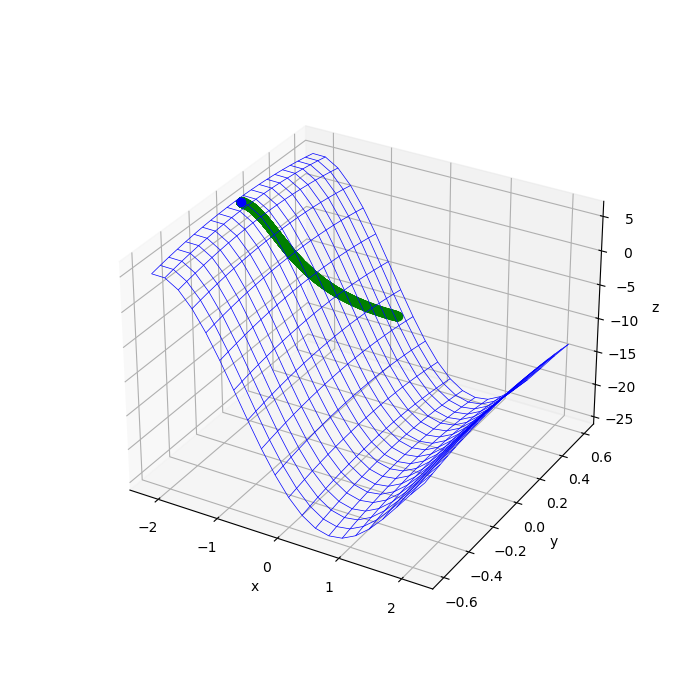

In [151]:
fig = plt.figure(figsize = (7,7))
ax3d = fig.add_subplot(projection = '3d')
ax3d.plot_wireframe(xgrid,ygrid,zgrid, color = 'b', linewidth = 0.5)
ax3d.set_xlabel('x')
ax3d.set_ylabel('y')
ax3d.set_zlabel('z')
ax3d.plot(x1[0:-2], y1[0:-2], z1[0:-2], '-ok', color = 'g', linewidth = 2)
ax3d.plot(x1[-1], y1[-1], z1[-1], '-ok', color = 'b', linewidth = 2)
plt.show()

<IPython.core.display.Javascript object>


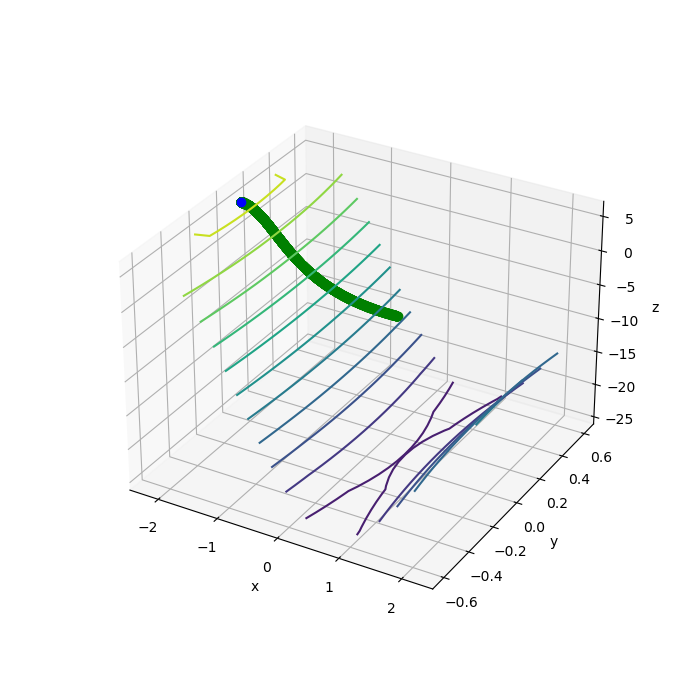

In [152]:
fig1 = plt.figure(figsize = (7,7))
ax3dlevel = fig1.add_subplot(projection = '3d')
ax3dlevel.contour(xgrid, ygrid, zgrid, 10)
ax3dlevel.set_xlabel('x')
ax3dlevel.set_ylabel('y')
ax3dlevel.set_zlabel('z')
ax3dlevel.plot(x1[0:-2], y1[0:-2], z1[0:-2], '-ok', color = 'g', linewidth = 2)
ax3dlevel.plot(x1[-1], y1[-1], z1[-1], '-ok', color = 'b', linewidth = 2)
plt.show()

<IPython.core.display.Javascript object>


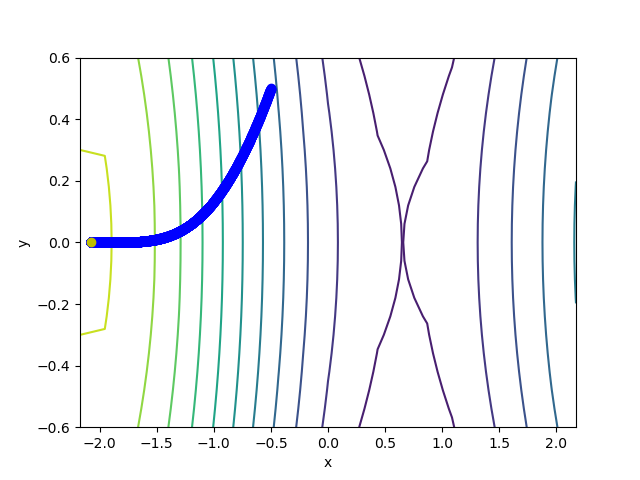

In [153]:
fig2, ax = plt.subplots()
ax.contour(xgrid, ygrid, zgrid, 10)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.plot(x1[0:-2], y1[0:-2], '-ok', color = 'b')
plt.plot(x1[-1], y1[-1], '-ok', color = 'y')
plt.show()